In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_classes=2, n_clusters_per_class=1,
                          n_redundant=0, random_state=42, class_sep=10)

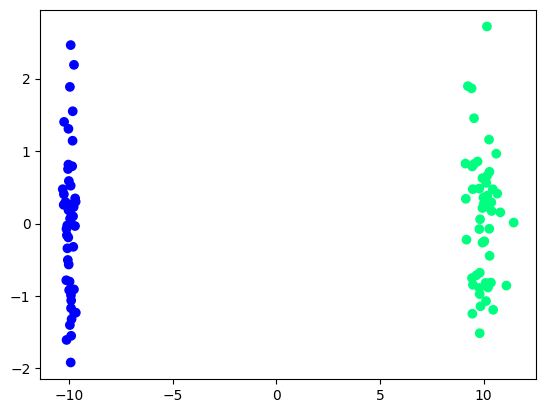

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")

In [5]:
def sigmoid(z):

    return 1 / (1 + np.exp(-z))

In [23]:
class Logistic_Regression():

    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            y_hat = sigmoid(np.dot(X_train, weights))

            error = y_train - y_hat

            weights = np.dot(error, X_train) / X_train.shape[0]

        self.coef_ = weights[1:]
        self.intercept_ =  weights[0]

        print(f"Coef_: {self.coef_} | Intercept_: {self.intercept_}")
    
    def predict(self, X_test):

        y_pred = sigmoid(np.dot(X_test, self.coef_))

        return y_pred



In [24]:
lg = Logistic_Regression(learning_rate=0.001, epochs=100)

In [30]:
lg.fit(X, y)

Coef_: [4.98821859 0.02023945] | Intercept_: 0.0


In [32]:
m = -(lg.coef_[0] / lg.coef_[1])
b = -(lg.intercept_ / lg.coef_[1])

In [33]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

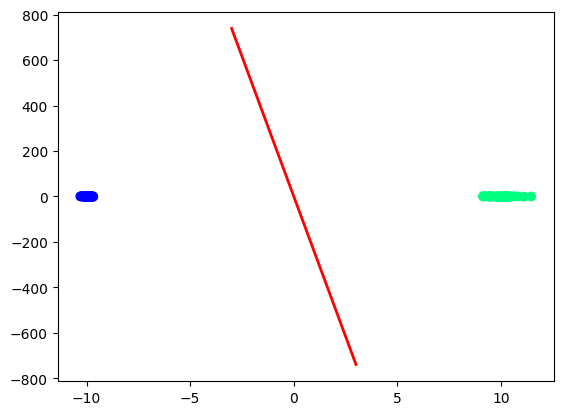

In [34]:
plt.plot(x_input, y_input, color="r", linewidth=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")
plt.show()